# Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
train_df = pd.read_csv('../input/shai-training-level-1-b/train.csv')
test_df = pd.read_csv("../input/shai-training-level-1-b/test.csv")

# Discover and visualize the Data

In [3]:
train_df.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.0,0.370,0.670,7.0,-11.007,0,0.0445,0.8090,0.000006,0.2360,0.802,177.164,5.209333,3,3
1,1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.0,0.659,0.639,6.0,-8.138,1,0.3880,0.4160,NaN,0.1160,0.688,99.517,206602.000000,4,5
2,2,The Cure,Play For Today,51.0,0.458,0.731,11.0,-12.049,0,0.1450,0.0487,0.021500,0.1160,0.784,80.425,218960.000000,4,6
3,3,Miguel Poveda,Coplas Del Querer,40.0,0.508,0.287,5.0,-8.898,0,0.0481,0.8340,NaN,0.0963,0.324,96.139,332467.000000,3,9
4,4,Leif Vollebekk,Long Blue Light,63.0,0.552,0.485,9.0,-9.111,1,0.0332,0.5170,0.106000,0.1640,0.510,71.548,200173.000000,4,1


In [4]:
test_df.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,0,Pale Waves,She's My Religion,52.0,0.522,0.726,4.0,-4.115,1,0.0383,0.348000,0.000005,0.1480,0.331,161.867,189587.0,4
1,1,Mungo Jerry,In the Summertime,69.0,0.754,0.449,4.0,-14.013,1,0.0615,0.724000,NaN,0.1620,0.973,82.751,211880.0,4
2,2,Buddy Holly & The Crickets,Maybe Baby,50.0,0.607,0.477,9.0,-12.904,1,0.0333,0.708000,NaN,0.2530,0.887,136.614,122600.0,4
3,3,Superheaven,Life In a Jar,40.0,0.484,0.872,1.0,-5.586,1,0.0559,0.000384,0.000672,0.1480,0.347,150.027,222208.0,4
4,4,HARDY,GIVE HEAVEN SOME HELL,64.0,0.639,0.843,11.0,-4.975,1,0.0362,0.052500,NaN,0.0854,0.528,126.047,217802.0,4


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14045 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12784 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10837 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3600 non-null   int64  
 1   Artist Name         3600 non-null   object 
 2   Track Name          3600 non-null   object 
 3   Popularity          3523 non-null   float64
 4   danceability        3600 non-null   float64
 5   energy              3600 non-null   float64
 6   key                 3198 non-null   float64
 7   loudness            3600 non-null   float64
 8   mode                3600 non-null   int64  
 9   speechiness         3600 non-null   float64
 10  acousticness        3600 non-null   float64
 11  instrumentalness    2782 non-null   float64
 12  liveness            3600 non-null   float64
 13  valence             3600 non-null   float64
 14  tempo               3600 non-null   float64
 15  duration_in min/ms  3600 non-null   float64
 16  time_s

In [7]:
train_df.isna().sum()

id                       0
Artist Name              0
Track Name               0
Popularity             351
danceability             0
energy                   0
key                   1612
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3559
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [8]:
test_df.isna().sum()

id                      0
Artist Name             0
Track Name              0
Popularity             77
danceability            0
energy                  0
key                   402
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      818
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [9]:
train_df.describe()

,id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14045.000000,14396.000000,14396.000000,12784.000000,14396.000000,14396.000000,14396.000000,14396.000000,10837.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7197.500000,44.591954,0.542981,0.663347,5.957838,-7.897393,0.638580,0.079479,0.246606,0.177489,0.195594,0.486931,122.729981,2.009550e+05,3.927341,6.695679
std,4155.911573,17.436540,0.166668,0.235709,3.190628,4.063214,0.480429,0.083048,0.310371,0.304133,0.158487,0.240281,29.558253,1.118463e+05,0.352828,3.206170
min,0.000000,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.013600,0.018300,34.132000,5.339167e-01,1.000000,0.000000
25%,3598.750000,33.000000,0.430000,0.510000,3.000000,-9.525250,0.000000,0.034800,0.004208,0.000088,0.097400,0.299000,99.799000,1.669988e+05,4.000000,5.000000
50%,7197.500000,44.000000,0.545000,0.701000,6.000000,-7.006000,1.000000,0.047400,0.080750,0.003920,0.129000,0.481000,120.069500,2.095845e+05,4.000000,8.000000
75%,10796.250000,56.000000,0.659000,0.861000,9.000000,-5.161000,1.000000,0.082500,0.434000,0.199000,0.257000,0.673000,141.990250,2.522970e+05,4.000000,10.000000
max,14395.000000,100.000000,0.989000,0.999000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [10]:
test_df.describe()

,id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,3600.000000,3523.000000,3600.000000,3600.000000,3198.000000,3600.000000,3600.000000,3600.000000,3600.000000,2782.000000,3600.000000,3600.000000,3600.000000,3.600000e+03,3600.000000
mean,1799.500000,44.193869,0.545241,0.660496,5.930894,-7.963711,0.629444,0.080618,0.248982,0.177846,0.198473,0.483319,122.196666,1.999025e+05,3.910833
std,1039.374812,17.387381,0.164670,0.234046,3.222037,3.992539,0.483021,0.085660,0.311709,0.303774,0.162079,0.239864,29.624822,1.125702e+05,0.394593
min,0.000000,1.000000,0.059900,0.003010,1.000000,-34.797000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000
25%,899.750000,33.000000,0.438000,0.506000,3.000000,-9.581000,0.000000,0.035000,0.004987,0.000090,0.097775,0.291750,98.734000,1.636295e+05,4.000000
50%,1799.500000,44.000000,0.547000,0.695000,6.000000,-7.092000,1.000000,0.047650,0.084000,0.003870,0.130000,0.480500,120.038500,2.083895e+05,4.000000
75%,2699.250000,56.000000,0.660000,0.857000,9.000000,-5.284000,1.000000,0.084725,0.436250,0.201750,0.260250,0.668000,141.325250,2.533070e+05,4.000000
max,3599.000000,100.000000,0.973000,1.000000,11.000000,0.943000,1.000000,0.872000,0.995000,0.983000,0.992000,0.982000,216.053000,1.385907e+06,5.000000


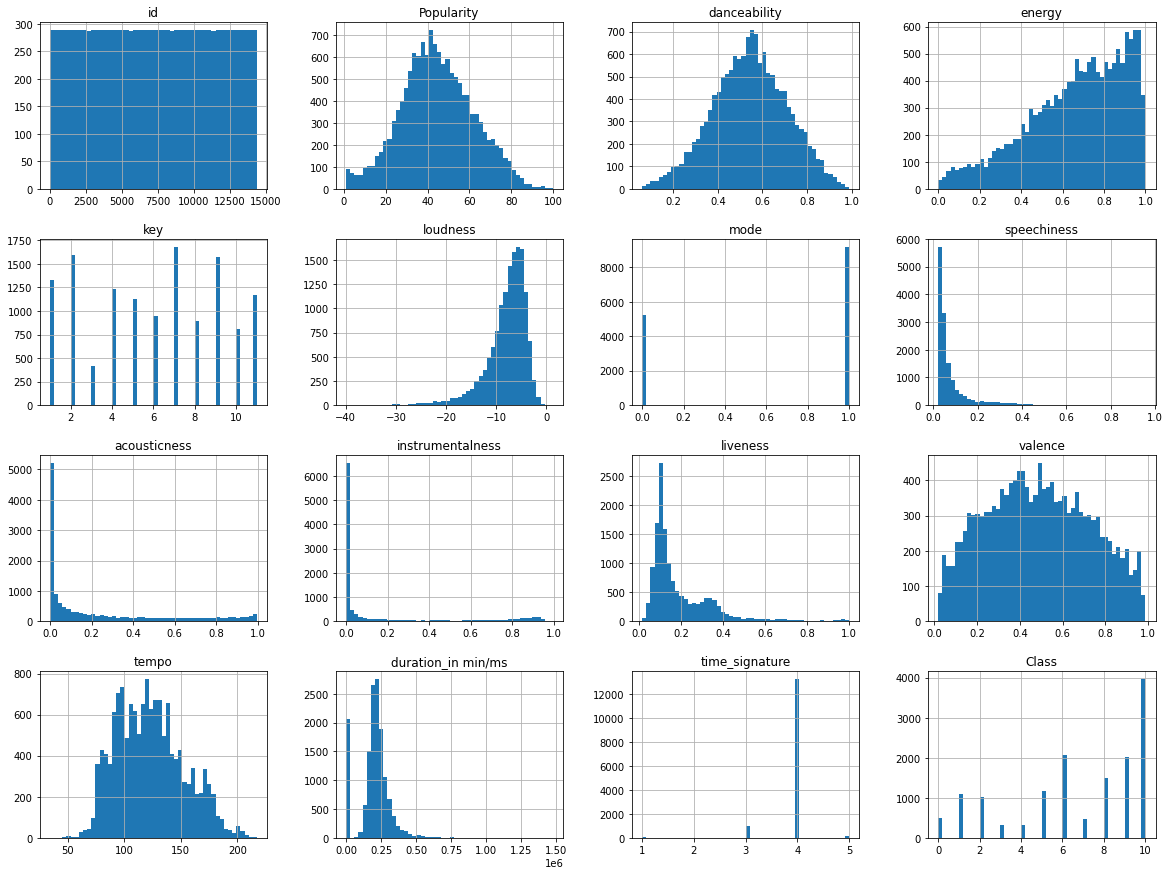

In [11]:
train_df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

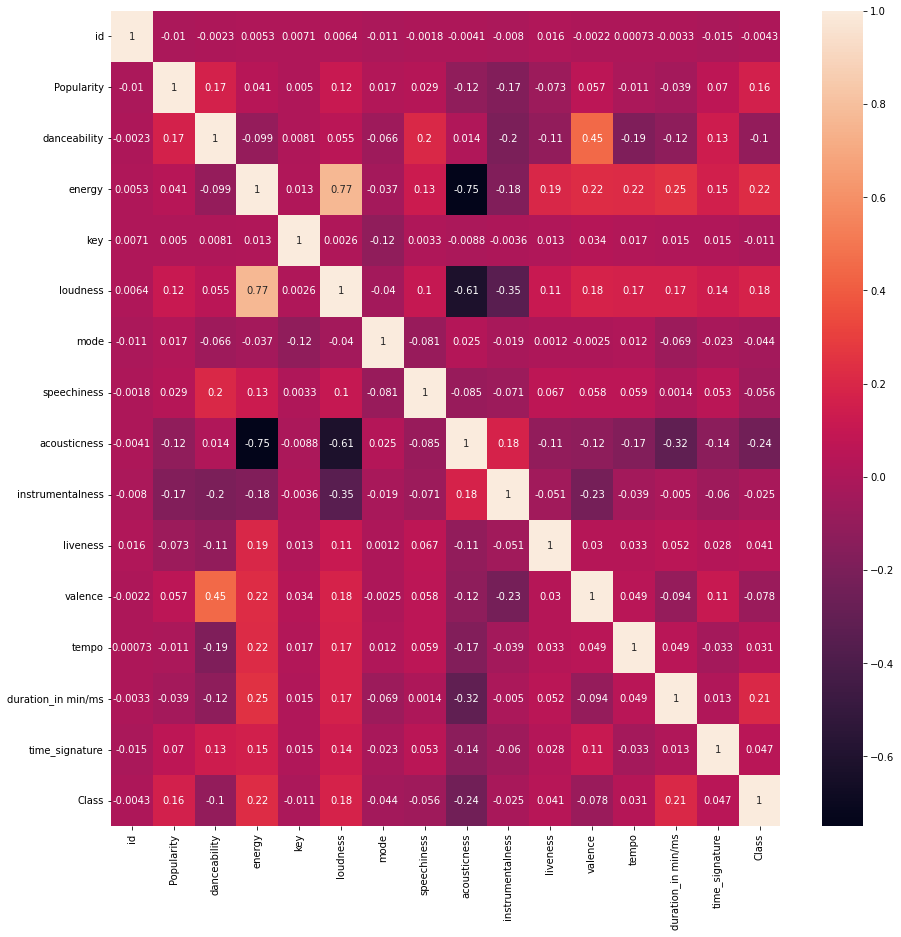

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(),annot=True)

In [13]:
corr_matrix = train_df.corr()
corr_matrix['Class'].sort_values(ascending= False)

Class                 1.000000
energy                0.221837
duration_in min/ms    0.205521
loudness              0.179647
Popularity            0.159977
time_signature        0.047389
liveness              0.041245
tempo                 0.031248
id                   -0.004332
key                  -0.010587
instrumentalness     -0.025039
mode                 -0.043674
speechiness          -0.055894
valence              -0.078111
danceability         -0.101228
acousticness         -0.241062
Name: Class, dtype: float64

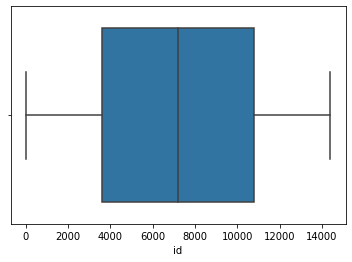

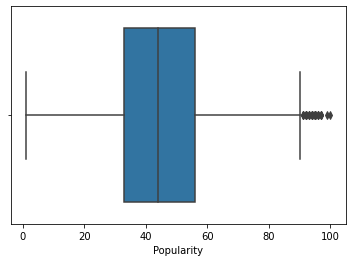

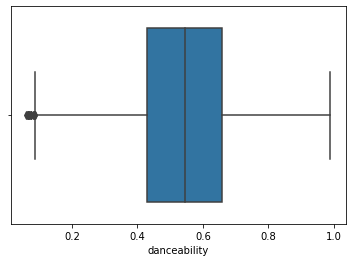

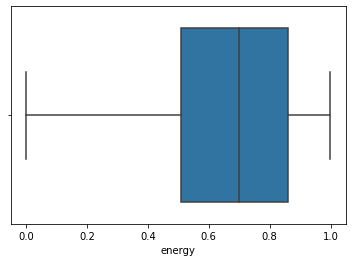

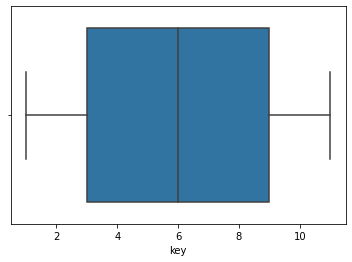

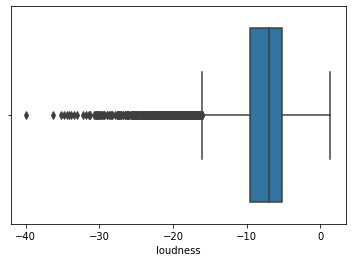

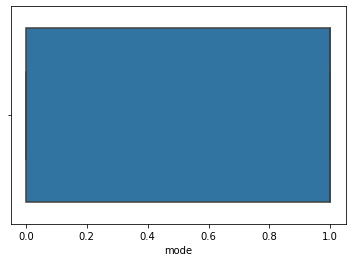

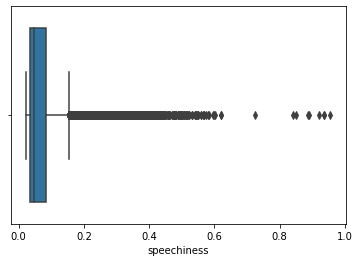

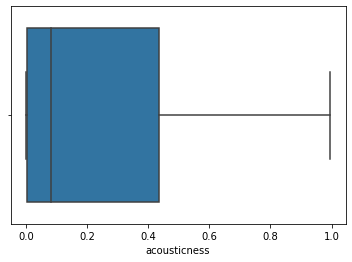

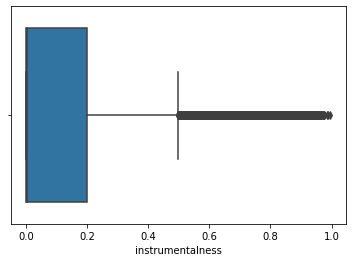

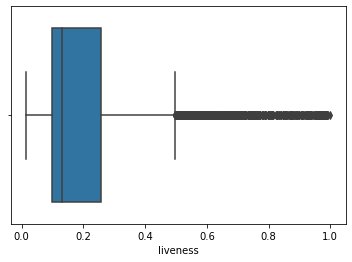

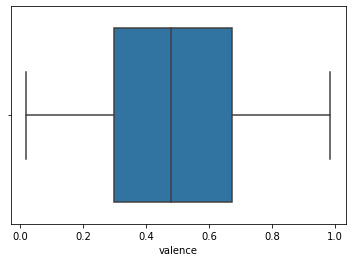

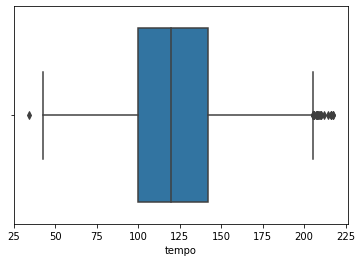

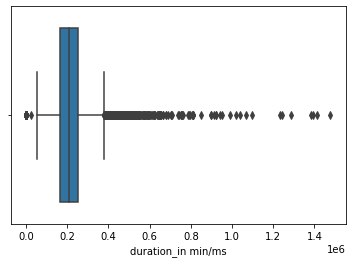

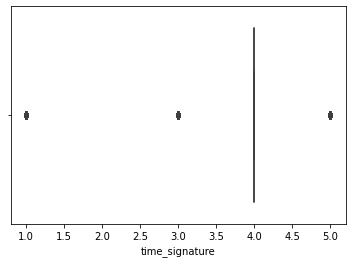

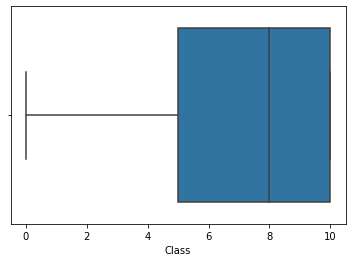

In [14]:
j=1
for j in train_df.select_dtypes(exclude=['object']):
  sns.boxplot(x=train_df[j])
  plt.show()

# Data Pre-Processing

In [15]:
train_df.drop(['id','key'],axis=1,inplace=True)
test_df.drop(['id','key'],axis=1,inplace=True)

In [16]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
train_df[['Popularity','instrumentalness']]=imp.fit_transform(train_df[['Popularity','instrumentalness']])

In [17]:
test_df.Popularity = test_df.Popularity.fillna(value=train_df.Popularity.median(), axis=0)
test_df.instrumentalness = test_df.instrumentalness.fillna(value=train_df.instrumentalness.median(), axis=0)

# Data split

In [18]:
X=train_df.drop('Class',axis=1)
y=train_df['Class']

In [19]:
'''from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.25, random_state= 107)
for train_index, test_index in split.split(X,y):
  X_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  X_test = X.iloc[test_index]
  y_test = y.iloc[test_index]'''

'from sklearn.model_selection import StratifiedShuffleSplit\n\nsplit = StratifiedShuffleSplit(n_splits=1 , test_size=0.25, random_state= 107)\nfor train_index, test_index in split.split(X,y):\n  X_train = X.iloc[train_index]\n  y_train = y.iloc[train_index]\n  X_test = X.iloc[test_index]\n  y_test = y.iloc[test_index]'

In [20]:
cat_cols = ['Artist Name', 'Track Name']

# Train model

In [21]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(n_estimators=1500, depth =6 ,learning_rate=0.05, random_state=10, eval_metric= 'MultiClass', cat_features=cat_cols)
cat_clf.fit(X,y)

0:	learn: 2.3003477	total: 281ms	remaining: 7m 1s
1:	learn: 2.2194499	total: 492ms	remaining: 6m 8s
2:	learn: 2.1488528	total: 713ms	remaining: 5m 55s
3:	learn: 2.0909005	total: 932ms	remaining: 5m 48s
4:	learn: 2.0379639	total: 1.15s	remaining: 5m 43s
5:	learn: 1.9905645	total: 1.36s	remaining: 5m 39s
6:	learn: 1.9442037	total: 1.58s	remaining: 5m 37s
7:	learn: 1.9042323	total: 1.79s	remaining: 5m 34s
8:	learn: 1.8684154	total: 2.01s	remaining: 5m 33s
9:	learn: 1.8362716	total: 2.23s	remaining: 5m 31s
10:	learn: 1.8047749	total: 2.44s	remaining: 5m 29s
11:	learn: 1.7785317	total: 2.65s	remaining: 5m 28s
12:	learn: 1.7522617	total: 2.86s	remaining: 5m 27s
13:	learn: 1.7150556	total: 3.06s	remaining: 5m 24s
14:	learn: 1.6800859	total: 3.27s	remaining: 5m 24s
15:	learn: 1.6525841	total: 3.49s	remaining: 5m 24s
16:	learn: 1.6247483	total: 3.69s	remaining: 5m 21s
17:	learn: 1.5983877	total: 3.85s	remaining: 5m 16s
18:	learn: 1.5768077	total: 4.01s	remaining: 5m 12s
19:	learn: 1.5541449	tot

# Fine-Tuning

In [22]:
'''from sklearn.model_selection import GridSearchCV 

 
param_grid = [ 
 {'n_estimators': [500, 1000, 1500 ],'depth':[4,6,8]} ] 
 

grid_search = GridSearchCV(cat_clf , param_grid, cv=3,scoring='f1_macro',return_train_score=True,n_jobs=-1,) 
grid_search.fit(X,y)'''

"from sklearn.model_selection import GridSearchCV \n\n \nparam_grid = [ \n {'n_estimators': [500, 1000, 1500 ],'depth':[4,6,8]} ] \n \n\ngrid_search = GridSearchCV(cat_clf , param_grid, cv=3,scoring='f1_macro',return_train_score=True,n_jobs=-1,) \ngrid_search.fit(X,y)"

In [23]:
#grid_search.best_params_

# Save and load models

In [24]:
pred_cat=cat_clf.predict(test_df)

In [25]:
out = pd.DataFrame(pred_cat,columns=['Class'])
out.insert(0,'id',out.index)
out.to_csv('output.csv', index= False)